In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import custom functions from src/utils.py
import sys
sys.path.append('../')
from src.utils import remove_correlated_features
from src.utils import plot_correlation_heatmap

In [2]:
### Data Cleaning and Preparation
# Load the data
data = pd.read_csv('../data/homeprices.csv')
data.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [3]:
# Check for missing values or empty cells
data.isnull().sum()

town     0
area     0
price    0
dtype: int64

In [4]:
# Handle categorical data
dummies = pd.get_dummies(data['town'],dtype=int)
dummies.head()

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [5]:
merged_data = pd.concat([data,dummies],axis='columns')
merged_data.head()

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


In [6]:
processed_df = merged_data.drop(['town'],axis='columns')
processed_df.head()

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


In [7]:
features_df = processed_df.drop(['price'],axis='columns')
target_df = processed_df['price']

In [8]:
features_df.head()

,area,monroe township,robinsville,west windsor
0,2600,1,0,0
1,3000,1,0,0
2,3200,1,0,0
3,3600,1,0,0
4,4000,1,0,0


In [9]:
# remove correlated features to avoid multicollinearity problem in the model 
# (i.e. when two or more features are highly correlated; in this case, we will remove one of the correlated features)
corr_matrix = features_df.corr().abs()
corr_matrix

,area,monroe township,robinsville,west windsor
area,1.000000,0.242642,0.146993,0.108775
monroe township,0.242642,1.000000,0.527046,0.527046
robinsville,0.146993,0.527046,1.000000,0.444444
west windsor,0.108775,0.527046,0.444444,1.000000


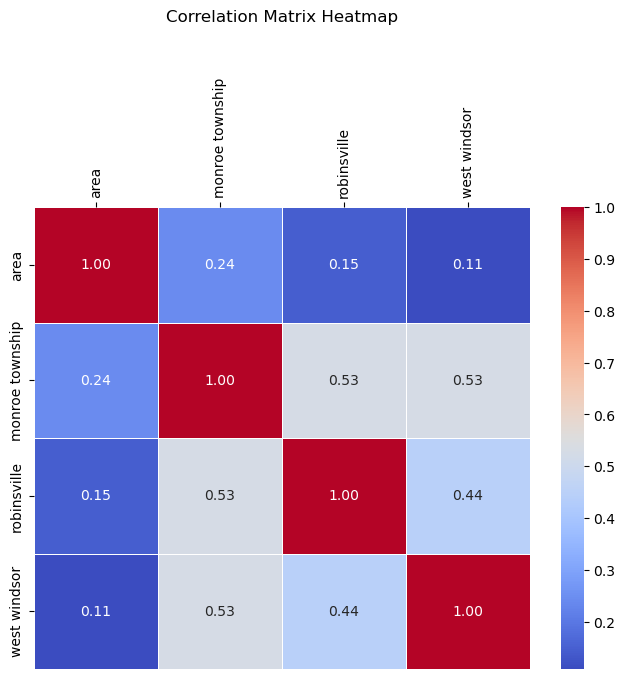

In [10]:
plot_correlation_heatmap(features_df)

In [11]:
features_df = remove_correlated_features(features_df, 0.85)
features_df.head()

,area,monroe township,robinsville,west windsor
0,2600,1,0,0
1,3000,1,0,0
2,3200,1,0,0
3,3600,1,0,0
4,4000,1,0,0


In [12]:
# drop one of the dummy variables to avoid the dummy variable trap for linear/logistic regression
features_df = features_df.drop(['west windsor'],axis='columns')
features_df.head()

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
